# Experiments with dynamic scaling and CNNs

_23 August 2021_ <br />
_Chuan-Zheng Lee <czlee@stanford.edu>_ <br />
_Rough working_

Continuation of work in `dynamic-cnns.ipynb`.

In [1]:
import matplotlib.pyplot as plt
from plotting import plot_averaged_training_charts, plot_comparison, make_axes, show_timestamp_info

# Fashion-MNIST

In [2]:
def get_comparison_specs(noise='__all__'):
    common_specs = {
        'rounds':                 ('expect', 150),
        'batch_size':             ('expect', 64),
        'epochs':                 ('expect', 1),
        'ema_coefficient':        ('expect', 1 / 3),
        'data_per_client':        ('expect', None),
        'save_squared_error':     ('expect', False),
        'send':                   ('expect', 'deltas'),
        'power':                  ('title',  1.0),
        'dataset':                ('title',  'fashionmnist-cnn2'),
        'momentum_client':        ('expect', 0.0),
        'weight_decay_client':    ('expect', 0.0),
        'optimizer_client':       ('expect', 'sgd'),
        'clients':                ('title',  20),
        'noise':                  ('series', noise),
        'lr_client':              ('series',  '__all__'),
        'lr_scheduler_client':    ('series', '__all__'),
    }
    analog_specs = common_specs.copy()
    analog_specs.update({
        'script': 'dynpower.py',
        'power_update_period':    ('expect', 1),
        'power_quantile':         ('expect', 0.9),
        'power_factor':           ('expect', 0.9),
    })
    digital_specs = common_specs.copy()
    digital_specs.update({
        'script': 'dynquant.py',
        'qrange_update_period':   ('expect', 1),
        'qrange_param_quantile':  ('expect', 0.9),
        'qrange_client_quantile': ('expect', 0.9),
        'channel_uses':           ('expect', None),
        'rounding_method':        ('expect', 'stochastic'),
        'parameter_schedule':     ('expect', 'staggered'),
        'zero_bits_strategy':     ('expect', 'read-zero'),
    })
    
    return analog_specs, digital_specs

def _plot_comparisons(field, paths, all_specs, zoom_ylim=None, axsize=(11, 7), **kwargs):
    axs = make_axes(2 if zoom_ylim else 1, axsize=axsize)
    kwargs.setdefault('extra_lines', ['confints'])
    plot_comparison(field, paths, *all_specs, ax=axs[0], **kwargs)
    if zoom_ylim:
        plot_comparison(field, paths, *all_specs, ax=axs[1], quiet=True, **kwargs)
        axs[1].set_ylim(zoom_ylim)

def plot_analog_vs_digital(paths, noise='__all__', field='accuracy', zoom_ylim=None, **kwargs):
    all_specs = get_comparison_specs(noise)
    _plot_comparisons(field, paths, all_specs, zoom_ylim=zoom_ylim, **kwargs)

| experiments | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **22 Aug 2021, 09:20:39** | 22 Aug 2021, 10:10:02 | 49 min 23 s |
| last to finish | 22 Aug 2021, 15:22:20 | **22 Aug 2021, 16:05:34** | 43 min 13 s |
| shortest | 22 Aug 2021, 14:38:14 | 22 Aug 2021, 15:21:20 | **43 min 06 s** |
| longest | 22 Aug 2021, 09:32:19 | 22 Aug 2021, 10:27:03 | **54 min 43 s** |


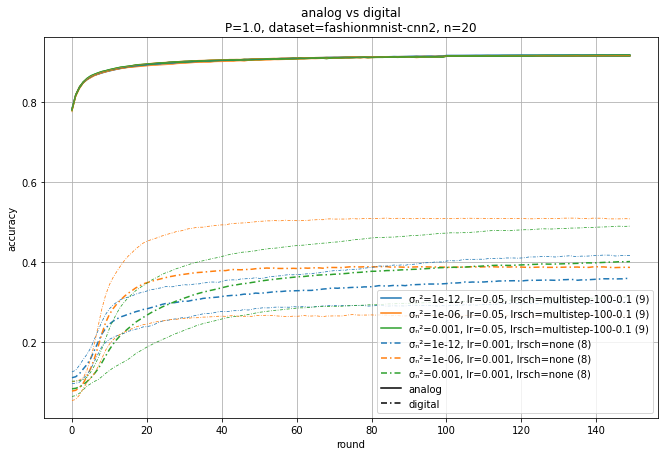

In [3]:
paths = ["results/20210822-fmnist-dynamic-2"]
show_timestamp_info(paths)
plot_analog_vs_digital(paths, extra_lines=['confints'], both_legends=True)

| experiments | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **22 Aug 2021, 16:14:12** | 22 Aug 2021, 16:43:45 | 29 min 32 s |
| last to finish | 22 Aug 2021, 16:14:12 | **22 Aug 2021, 16:46:19** | 32 min 06 s |
| shortest | 22 Aug 2021, 16:14:12 | 22 Aug 2021, 16:43:45 | **29 min 32 s** |
| longest | 22 Aug 2021, 16:14:12 | 22 Aug 2021, 16:46:19 | **32 min 06 s** |


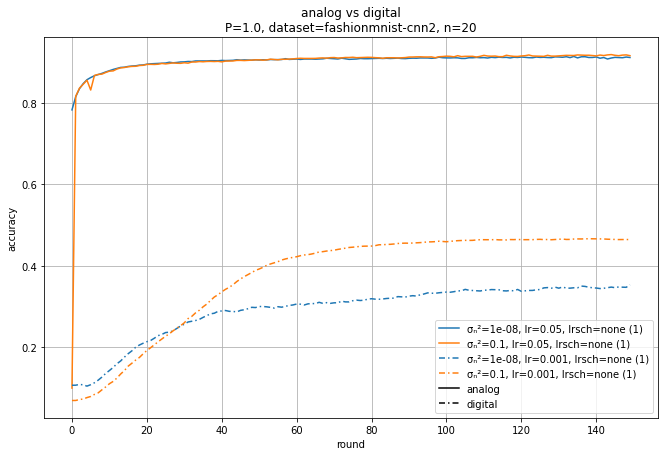

In [4]:
paths = ["results/20210822-fmnist-dynamic-3"]
show_timestamp_info(paths)
plot_analog_vs_digital(paths, extra_lines=[], both_legends=True)

# CIFAR-10

In [5]:
paths = ["results/20210822-cifar-dynamic-2/"]
show_timestamp_info(paths)

| experiments | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **22 Aug 2021, 09:23:51** | 22 Aug 2021, 11:03:21 | 1 h 39 min 30 s |
| last to finish | 22 Aug 2021, 14:24:05 | **22 Aug 2021, 16:04:20** | 1 h 40 min 15 s |
| shortest | 22 Aug 2021, 14:10:51 | 22 Aug 2021, 15:46:06 | **1 h 35 min 14 s** |
| longest | 22 Aug 2021, 09:23:51 | 22 Aug 2021, 11:04:24 | **1 h 40 min 33 s** |


In [6]:
def get_comparison_specs(noise='__all__'):
    common_specs = {
        'rounds':                 ('expect', 150),
        'batch_size':             ('title', 128),
        'epochs':                 ('expect', 1),
        'ema_coefficient':        ('expect', 1 / 3),
        'data_per_client':        ('expect', None),
        'save_squared_error':     ('expect', False),
        'send':                   ('expect', 'deltas'),
        'power':                  ('title',  1.0),
        'dataset':                ('title',  'cifar10-resnet20-flipcrop'),
        'lr_client':              ('title',  0.1),
        'momentum_client':        ('title',  0.9),
        'weight_decay_client':    ('title',  1e-4),
        'optimizer_client':       ('expect', 'sgd'),
        'clients':                ('title',  20),
        'noise':                  ('series', noise),
        'lr_scheduler_client':    ('expect', 'none'),
    }
    analog_specs = common_specs.copy()
    analog_specs.update({
        'script': 'dynpower.py',
        'power_update_period':    ('expect', 1),
        'power_quantile':         ('expect', 0.9),
        'power_factor':           ('expect', 0.9),
    })
    digital_specs = common_specs.copy()
    digital_specs.update({
        'script': 'dynquant.py',
        'qrange_update_period':   ('expect', 1),
        'qrange_param_quantile':  ('expect', 0.9),
        'qrange_client_quantile': ('expect', 0.9),
        'channel_uses':           ('expect', None),
        'rounding_method':        ('expect', 'stochastic'),
        'parameter_schedule':     ('expect', 'staggered'),
        'zero_bits_strategy':     ('expect', 'read-zero'),
    })
    
    return analog_specs, digital_specs

Digital doesn't even get off the ground. Also, that LR change at the 100th round might be counterproductive here.

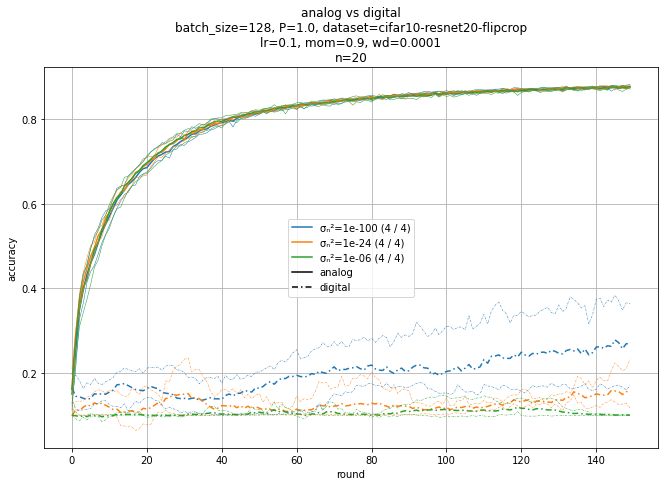

In [7]:
plot_analog_vs_digital(paths, noise=[1e-100, 1e-24, 1e-6], extra_lines=['range'])